**primary data analysis**

Has Missing Values? No but some data has missaligment because of csv specifity! should not be a problem for classification
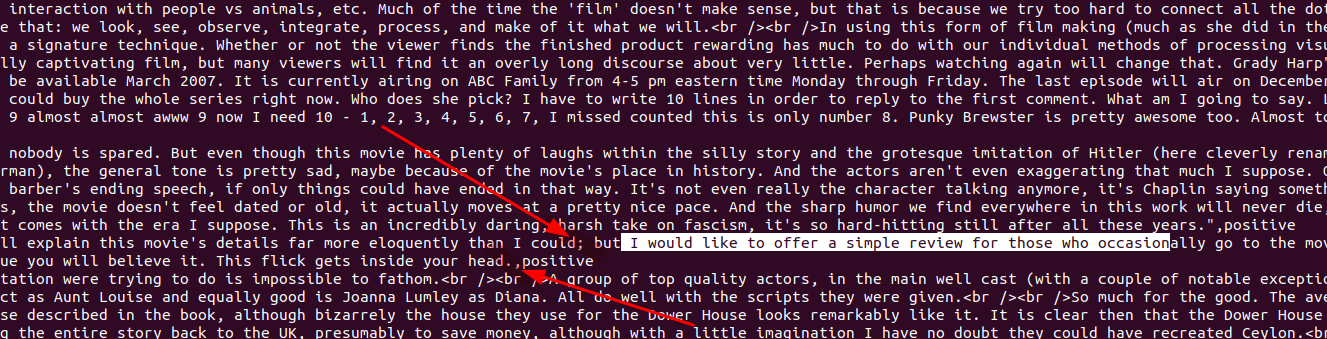

Dataset has 2 values:

*   comment - text
*   sentiment - categorical feature with 2 classes - target

In [ ]:
from google.colab import drive
import os.path
drive.mount('/content/gdrive', force_remount=True)
data_set_path = '/content/gdrive/MyDrive/ML/HW13/'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline


df = pd.read_csv(data_set_path + 'IMDB Dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Step 1: Prepare your dataset (X contains text data, y contains labels)
X = df['review']
y = df['sentiment']

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 2: Text Vectorization (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


# Step 4: Choose a Classifier (Logistic Regression in this example)
classifier = LogisticRegression()

# Step 5: Train the Classifier
classifier.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print more detailed classification metrics
print(classification_report(y_test, y_pred))



Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

['positive']


Let try to use our trained model to define random comment from IMDB site:

In [ ]:
#Check random commit
input_text = ['I just finished watching episode 4 and I have to say that it\'s really great and I see lots of potential in this series and I hope it gets a season 2 and I think that once people make it to episode 4, they will be more willing to watch this series and do not look at all the bad reviews just watch it and see it for yourself and I did think it would be a decent show but I got it all wrong, it is a great show and I hope you will enjoy what Dave Filoni had put into this masterpiece of a series. I remember as soon as I watched the first 5 minutes of episode 1, I immediately got rogue one vibes from it.']

# Vectorize the input text using the same TF-IDF vectorizer
input_tfidf = tfidf_vectorizer.transform(input_text)

# Make predictions
prediction = classifier.predict(input_tfidf)

# Convert the encoded prediction back to the original label
predicted_label = label_encoder.inverse_transform(prediction)

# Print the predicted label
print(predicted_label)

['positive']
